In [1]:
from os.path import join as pathjoin
from data_processing import *
from interpretation import *
from models import *
from training import *

In [2]:
DATA_DIR = '/home/mlepekhin/data/min_gpt_bpe'
MODELS_DIR = '/home/mlepekhin/models'
MODEL_ID = 'allennlp_rubert_from_topic_generated'
CHECKPOINTS_DIR = pathjoin(MODELS_DIR, MODEL_ID, 'checkpoints')
BEST_MODEL = pathjoin(CHECKPOINTS_DIR, 'best.th')

In [3]:
transformer_model = 'DeepPavlov/rubert-base-cased'
MAX_TOKENS = 512

### Loading of the pretrained model

In [4]:
vocab = Vocabulary().from_files(pathjoin(MODELS_DIR, MODEL_ID, 'vocab'))
model = build_transformer_model(vocab, transformer_model)

Building the model


In [5]:
id_to_label = vocab.get_index_to_token_vocabulary('labels')
print(id_to_label)
print(id_to_label.values())

{0: 'A8', 1: 'A12', 2: 'A1', 3: 'A14', 4: 'A11', 5: 'A17', 6: 'A16', 7: 'A4', 8: 'A9', 9: 'A7'}
dict_values(['A8', 'A12', 'A1', 'A14', 'A11', 'A17', 'A16', 'A4', 'A9', 'A7'])


In [6]:
if torch.cuda.is_available():
    cuda_device = 1
else:
    cuda_device = -1
print(cuda_device)
model.load_state_dict(torch.load(BEST_MODEL, map_location=f'cuda:{cuda_device}'))

1


<All keys matched successfully>

### Data loading

In [8]:
ru_test_df = pd.read_csv(pathjoin(DATA_DIR, '/home/mlepekhin/data/ru_test'))
ru_test_df.head()

,Unnamed: 0,target,text
0,726,A7,Глава 1 Приступая к работе 1.1 Знакомство с те...
1,1871,A17,Kawasaki D-Tracker С недавних пор Kawasaki d-t...
2,1265,A17,"По моему , вполне достойные книги , может и не..."
3,205,A11,Тест-драйв Lada Granta : новая надежда автогра...
4,141,A8,"среда , 2 декабря 2009 года , 12.33 Бумага всё..."


In [9]:
true_classes = ru_test_df.target.values
sentences = ru_test_df.text.values

### Preliminary analysis

In [10]:
dataset_reader = build_transformer_dataset_reader(transformer_model, MAX_TOKENS)
predictor = TextClassifierPredictor(model, dataset_reader=dataset_reader)
predicted_classes = np.array(predict_classes(sentences, predictor, vocab))

In [11]:
print(type(predicted_classes == 'A1'))

<class 'numpy.ndarray'>


In [12]:
print(len(np.unique(true_classes)))

10


In [13]:
calc_classifier_metrics(predicted_classes, true_classes)

label (argum) f1_score 0.6713286713286714 precision 0.6233766233766234 recall 0.7272727272727273
label (fictive) f1_score 0.6486486486486486 precision 0.5217391304347826 recall 0.8571428571428571
label (instruct) f1_score 0.7741935483870968 precision 0.7058823529411765 recall 0.8571428571428571
label (reporting) f1_score 0.9252336448598131 precision 0.9611650485436893 recall 0.8918918918918919
label (legal) f1_score 0.8461538461538461 precision 0.8461538461538461 recall 0.8461538461538461
label (personal) f1_score 0.5950413223140496 precision 0.7346938775510204 recall 0.5
label (commercial) f1_score 0.9079754601226994 precision 0.8705882352941177 recall 0.9487179487179487
label (research) f1_score 0.8431372549019608 precision 0.8775510204081632 recall 0.8113207547169812
label (info) f1_score 0.5230769230769231 precision 0.5151515151515151 recall 0.53125
label (eval) f1_score 0.5625 precision 0.5294117647058824 recall 0.6
accuracy 0.7660455486542443


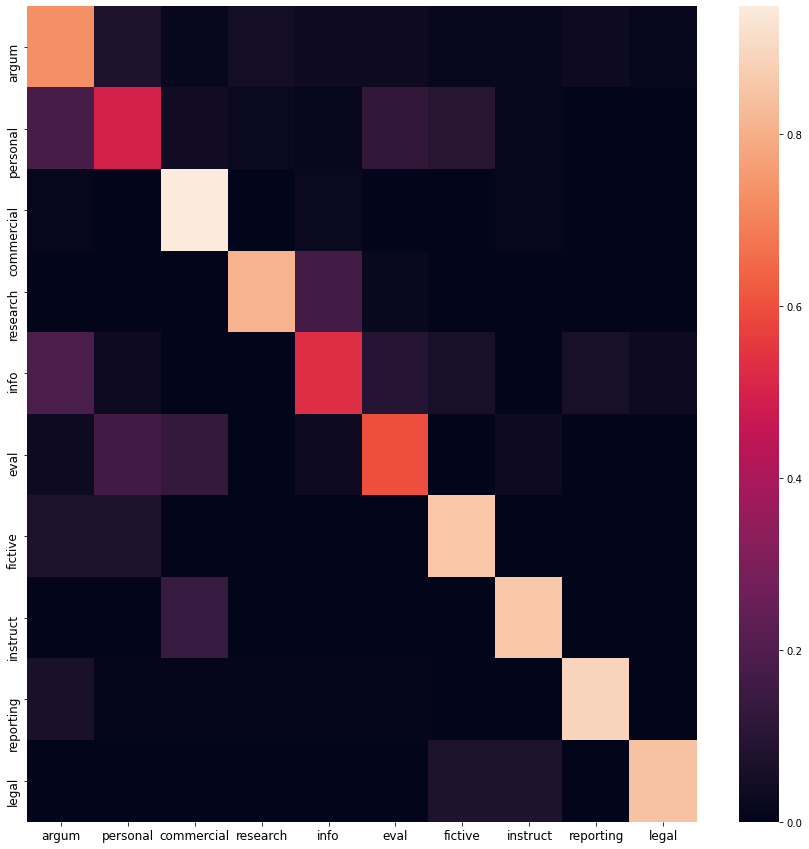

In [14]:
plot_confusion_matrix(predicted_classes, true_classes)